# **Task: Sales Performance Analysis**
Description:

1) Analyze sales data to identify patterns, trends, and factors affecting sales.

2) Create visualizations for sales performance and suggest strategies for improvement.

3) Get any open source dataset from kaggle or any other platform.

In [ ]:
path='/content/drive/MyDrive/Internee/Sales data.csv'

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv(path)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# **Analyzing Sales Data**

**Q.1: Total Sales for Each Year**

In [ ]:
df['Order Date']=pd.to_datetime(df['Order Date'], dayfirst=True)
df['Order Date'] = pd.to_datetime(df['Order Date'])
# Extarcting the Year from Order Date
df['Year'] = df['Order Date'].dt.year
total_sales_per_year = df.groupby('Year')['Sales'].sum()
print(total_sales_per_year)

Year
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: Sales, dtype: float64


**Q.2: Highest Sales Product Category**

In [ ]:
sales_category = df.groupby('Category')['Sales'].sum()
print(sales_category)

Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64


**Q.3: Sales Across Different Customer Segments**

In [ ]:
sales_segment=df.groupby('Segment')['Sales'].sum()
print(sales_segment)

Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64


**Q.4: Top 10 Products by Sales Revenue**

In [ ]:
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10)
print(top_products)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


**Q.5: Sales Performance by Shipping Modes**

In [ ]:
shipping_mode=df.groupby('Ship Mode')['Sales'].sum()
print(shipping_mode)

Ship Mode
First Class       3.455723e+05
Same Day          1.252190e+05
Second Class      4.499142e+05
Standard Class    1.340831e+06
Name: Sales, dtype: float64


**Q.6: Region Contribution to Total Sales**

In [ ]:
region_sales = df.groupby('Region')['Sales'].sum()
print(region_sales)


Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64


**Q.7: Sales Distribution Across Different States**

In [ ]:
state_sales = df.groupby('State')['Sales'].sum()
print(state_sales)

State
Alabama                  19510.6400
Arizona                  35272.6570
Arkansas                 11678.1300
California              446306.4635
Colorado                 31841.5980
Connecticut              13384.3570
Delaware                 27322.9990
District of Columbia      2865.0200
Florida                  88436.5320
Georgia                  48219.1100
Idaho                     4382.4860
Illinois                 79236.5170
Indiana                  48718.4000
Iowa                      4443.5600
Kansas                    2914.3100
Kentucky                 36458.3900
Louisiana                 9131.0500
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            28634.4340
Michigan                 76136.0740
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7464.9300
Nevada                   16729.1020
New Hampshire         

**Q.8: Sales by Month and Day of the Week**

In [ ]:
# Convert 'Order Date' to datetime with day first and error handling
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')

# Check for any NaT (Not a Time) values which could not be converted
if df['Order Date'].isnull().any():
    print("There are some invalid date entries which could not be converted.")
    print(df[df['Order Date'].isnull()])

# Extract the month and day of the week
df['Month'] = df['Order Date'].dt.month
df['Day of Week'] = df['Order Date'].dt.dayofweek

# Calculate monthly sales
monthly_sales = df.groupby('Month')['Sales'].sum()

# Calculate weekday sales
weekday_sales = df.groupby('Day of Week')['Sales'].sum()

# Print the results
print("Monthly Sales:")
print(monthly_sales)
print("\nWeekday Sales:")
print(weekday_sales)



Monthly Sales:
Month
1      94291.6296
2      59371.1154
3     197573.5872
4     136283.0006
5     154086.7237
6     145837.5233
7     145535.6890
8     157315.9270
9     300103.4117
10    199496.2947
11    350161.7110
12    321480.1695
Name: Sales, dtype: float64

Weekday Sales:
Day of Week
0    348791.5516
1    420535.9243
2    315888.9722
3    142839.2402
4    234710.8402
5    420901.4763
6    377868.7779
Name: Sales, dtype: float64


**Q.9: Top 10 Customers by Total Sales**

In [ ]:
#Q.11
top_customers = df.groupby('Customer Name')['Sales'].sum().nlargest(10)
print(top_customers)

Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


**Q.10: Average Order Value per Product Category**

In [ ]:
avg_order_value_category = df.groupby('Category')['Sales'].mean()
print(avg_order_value_category)

Category
Furniture          350.653790
Office Supplies    119.381001
Technology         456.401474
Name: Sales, dtype: float64


**Q.11: Sales by City within Each Region**

In [ ]:
city_sales = df.groupby(['Region', 'City'])['Sales'].sum()
print(city_sales)

Region   City       
Central  Aberdeen         25.5000
         Abilene           1.3920
         Allen           290.2060
         Amarillo       3773.0628
         Ann Arbor       889.2730
                          ...    
West     Westminster    3583.4860
         Whittier        444.7680
         Woodland        264.6620
         Yucaipa          50.8000
         Yuma            840.8650
Name: Sales, Length: 580, dtype: float64


**Q.12: Average Shipping Duration**

---



In [ ]:
# Convert 'Order Date' and 'Ship Date' to datetime with day first
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, errors='coerce')

# Check for any NaT (Not a Time) values which could not be converted
if df['Order Date'].isnull().any() or df['Ship Date'].isnull().any():
    print("There are some invalid date entries which could not be converted.")
    print(df[df['Order Date'].isnull() | df['Ship Date'].isnull()])
avg_shipping_duration = df['Ship Date'] - df['Order Date']
avg_shipping_duration = avg_shipping_duration.mean()
print(avg_shipping_duration)

3 days 23:04:00.979591836


**Q.13: Comparison of Technology Products to Furniture and Office Supplies**

In [ ]:
category_comparison = df.groupby('Category')['Sales'].sum()
print(category_comparison)

Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64


**Q.14: Sales by Different Shipping Modes**

In [ ]:
shipping_mode_sales = df.groupby('Ship Mode')['Sales'].sum()
print(shipping_mode_sales)

Ship Mode
First Class       3.455723e+05
Same Day          1.252190e+05
Second Class      4.499142e+05
Standard Class    1.340831e+06
Name: Sales, dtype: float64


# **Visualizations**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**Sales Over Time**

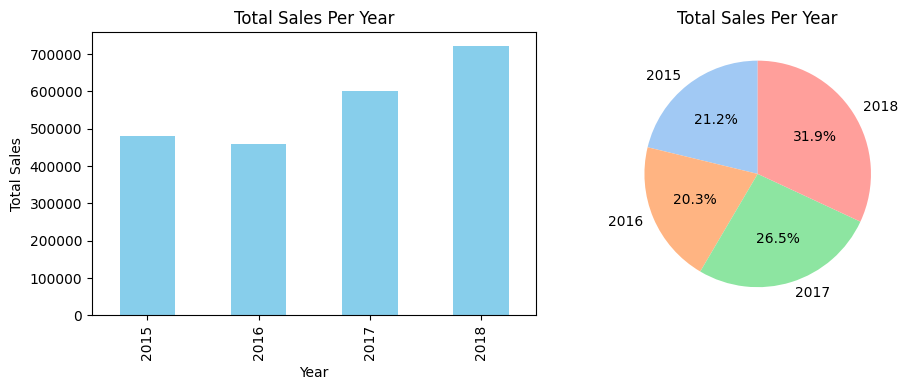

In [42]:
# Bar Chart
plt.figure(figsize=(10, 4))
# Bar chart
plt.subplot(1, 2, 1)
total_sales_per_year.plot(kind='bar', color='skyblue')
plt.title('Total Sales Per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')

# Pie Chart
plt.subplot(1, 2, 2)
total_sales_per_year.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Total Sales Per Year')
plt.ylabel('')  # Hide y-label for pie chart

plt.tight_layout()
plt.show()

 **Sales by Product Category**

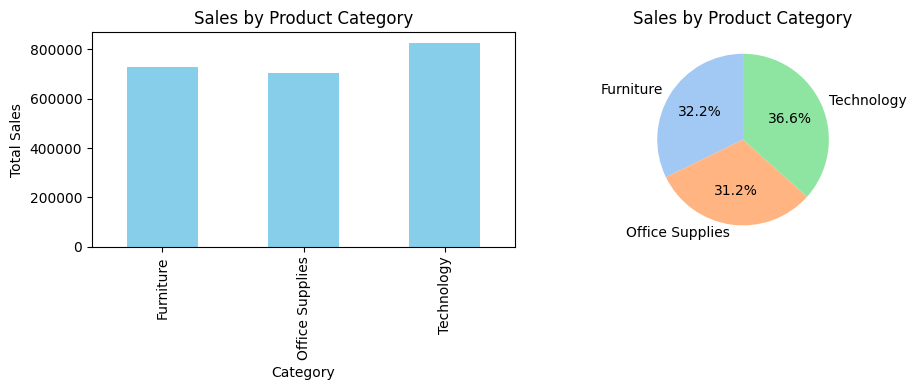

In [43]:
plt.figure(figsize=(10, 4))

# Bar chart
plt.subplot(1, 2, 1)
sales_category.plot(kind='bar', color='skyblue')
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')

# Pie Chart
plt.subplot(1, 2, 2)
sales_category.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Sales by Product Category')
plt.ylabel('')  # Hide y-label for pie chart

plt.tight_layout()
plt.show()

**Sales By Customer Segment**

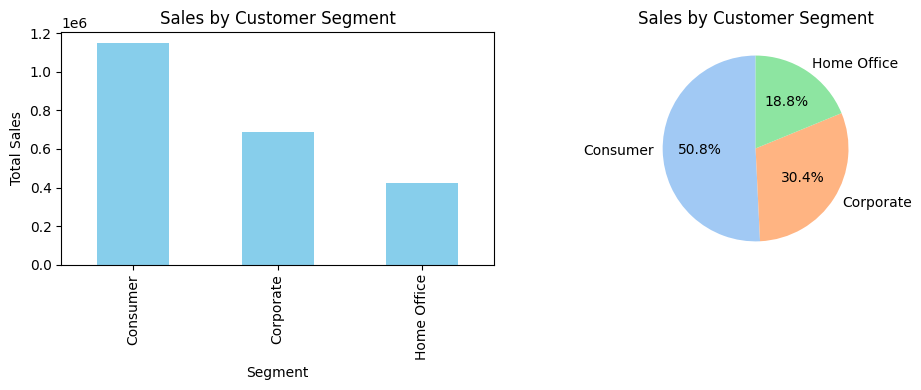

In [44]:
plt.figure(figsize=(10,4 ))

# Bar chart
plt.subplot(1, 2, 1)
sales_segment.plot(kind='bar', color='skyblue')
plt.title('Sales by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')

# Pie Chart
plt.subplot(1, 2, 2)
sales_segment.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Sales by Customer Segment')
plt.ylabel('')  # Hide y-label for pie chart

plt.tight_layout()
plt.show()


**Top 10 Products**

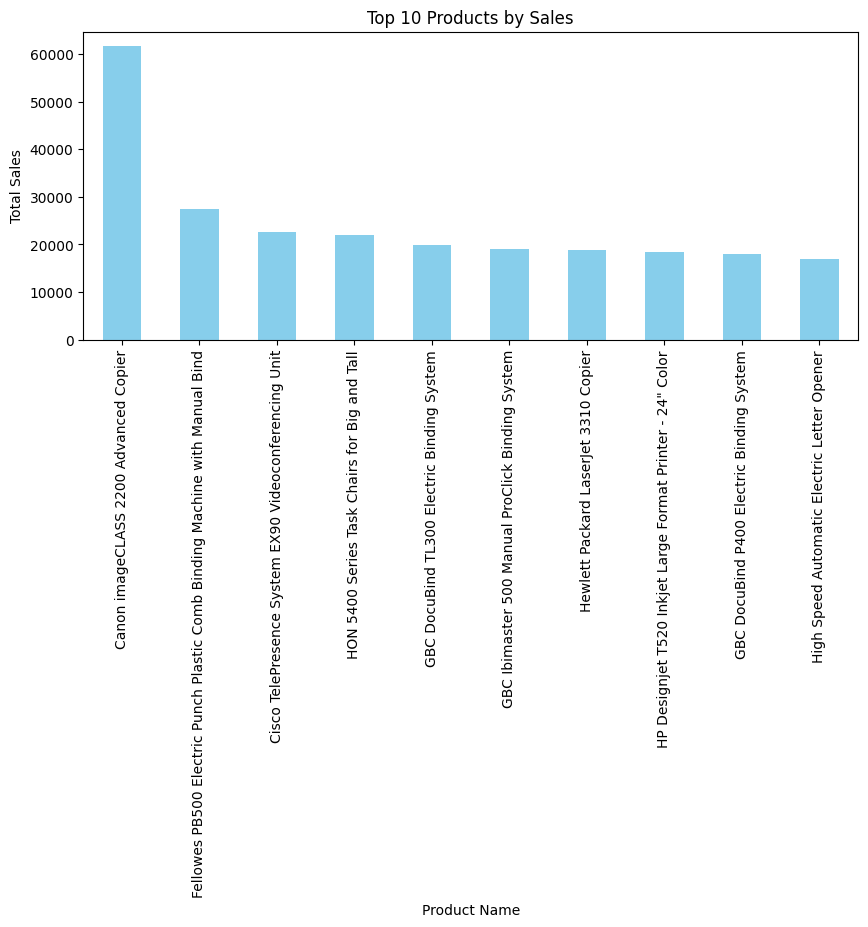

In [45]:
plt.figure(figsize=(10, 4))
top_products.plot(kind='bar',color='Skyblue')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.show()


**Shipping Mode**

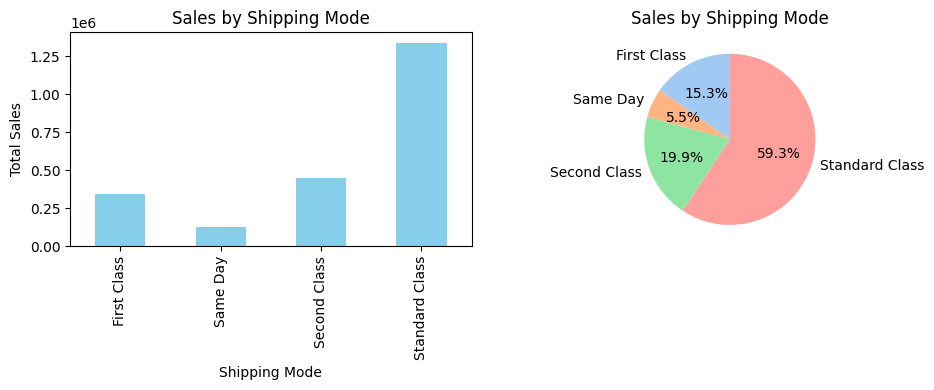

In [46]:
plt.figure(figsize=(10, 4))

# Bar chart
plt.subplot(1, 2, 1)
shipping_mode_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Total Sales')

# Pie Chart
plt.subplot(1, 2, 2)
shipping_mode_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Sales by Shipping Mode')
plt.ylabel('')  # Hide y-label for pie chart

plt.tight_layout()
plt.show()
